#Data 04: Super store
* Super store 데이터는 국제 배송이 가능한 판매점의 데이터입니다.
*   Data from: https://www.kaggle.com/rohitsahoo/sales-forecasting

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font' , family = 'NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)


In [9]:
s_df = pd.read_csv('/content/drive/MyDrive/dataset/LAB_dataset/Superstore Data.csv')

In [10]:
s_df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


<컬럼 설명>

* Row ID: 일련번호
* Order ID: 주문코드(주문시마다 생성되는 트랜잭션 ID)
* Order Date: 주문일자	
* Ship Date: 배송일자
* Ship Mode: 선적 유형(1st / 2nd / Standard class)
* Customer ID: 고객ID	
* Customer Name: 고객 성명
* Segment: 주문 세그먼트(Consumer / Corpoerate / Home office)
* Country: 주문 국가(모두 US)
* City: 주문 도시
* State: 주문 주
* Postal Code: 주문 우편번호
* Region: 주문 지역(Central / East / South / West)
* Product ID: 상품코드
* Category: 카테고리-대분류
* Sub-Category: 카테고리-중분류
* Product Name: 상품명
* Sales: 판매가
* Quantity: 판매량
* Discount: 할인가
* Profit: 마진


* 범주형 변수: *빈도frequency 계산 가능*
               orderid, ship mode, customer id, customer name, segment,
               country, city, state, postal code, region, product id, category, sub-category, product name
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               시간변수(orderdate, shipdate), sales, suqntity, discount, profit

In [11]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
s_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
s_df.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,2016-09-05,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [17]:
print('총데이터 수 :',s_df.shape[0]*s_df.shape[1])
print('결측치 수 :',s_df.isnull().sum().sum())
print('데이터 기간 : ', min(s_df['Order Date']),' 부터 ',max(s_df['Order Date']))
print('전체 판매 물건 수 : ',s_df['Product ID'].nunique())

총데이터 수 : 209874
결측치 수 : 0
데이터 기간 :  2014-01-03  부터  2017-12-30
전체 판매 물건 수 :  1862


##2.질문하기

* 어떤 종류의 물건(sub-category)이 가장 많이 팔렸을까?
* 어느 도시에서 주문량이 가장 많았을까?
* 세그먼트와 지역에 따른 주문량과 판매금액은?
* 할인률이 높을수록 마진은 낮을까?
* 어떤 종류의 상품이 매출이 가장 높을까?
* 지도 위에 판매량을 나타낼 수 있을까?

##3.데이터 정비하기

##3-1 중복 데이터 처리하기

In [24]:
s_df.duplicated().sum()

0

In [25]:
s_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [26]:
s_df.columns = ['row_id','order_id','order_date','ship_date','ship_mode','cust_id','cust_name','seg'
,'country','city','state','post_code','region','product_id','category','subcategory','product_name'
,'sales','quantity','discount','profit']

In [27]:
s_df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'cust_id',
       'cust_name', 'seg', 'country', 'city', 'state', 'post_code', 'region',
       'product_id', 'category', 'subcategory', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

## 3-3 필요없는 컬럼 제거하기

In [28]:
# 우편번호 컬럼은 사용할 것 같지 않으므로 제거.

s_df = s_df.drop('post_code',axis=1)

In [29]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   order_date    9994 non-null   object 
 3   ship_date     9994 non-null   object 
 4   ship_mode     9994 non-null   object 
 5   cust_id       9994 non-null   object 
 6   cust_name     9994 non-null   object 
 7   seg           9994 non-null   object 
 8   country       9994 non-null   object 
 9   city          9994 non-null   object 
 10  state         9994 non-null   object 
 11  region        9994 non-null   object 
 12  product_id    9994 non-null   object 
 13  category      9994 non-null   object 
 14  subcategory   9994 non-null   object 
 15  product_name  9994 non-null   object 
 16  sales         9994 non-null   float64
 17  quantity      9994 non-null   int64  
 18  discount      9994 non-null 

#4.EDA & Visualization

In [30]:
s_df['product_name'].value_counts().head(10)

Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: product_name, dtype: int64

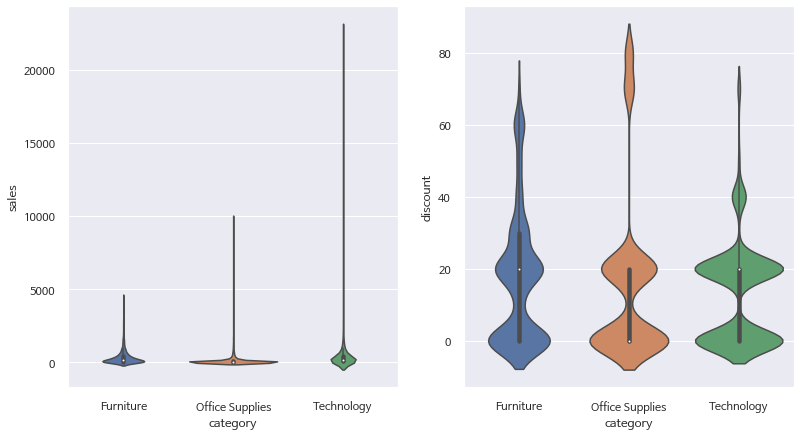

In [32]:
# violin plot 으로 카테고리별 판매금액과 할인율의 분포 확인하기.
f,ax = plt.subplots(1,2,figsize=(13,7))

sns.violinplot(x=s_df['category'],y=s_df['sales'],ax=ax[0])
sns.violinplot(x=s_df['category'],y=s_df['discount']*100,ax=ax[1])



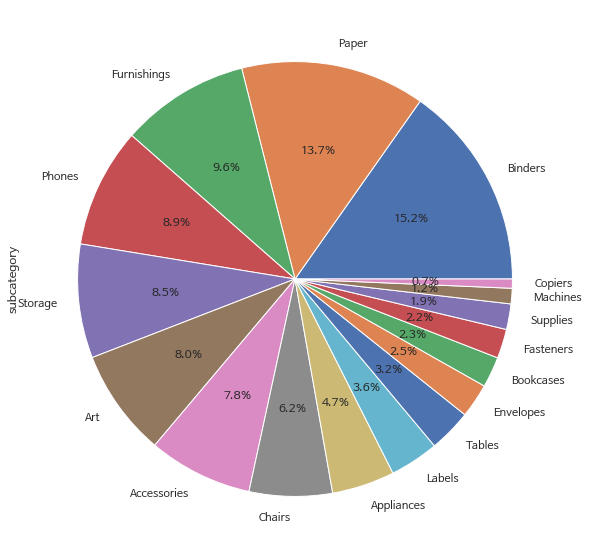

In [39]:
# sub_category 기준으로 어떤 것이 가장 주문량이 많은지 비율은?
# pie graph로 나타내기

plt.figure(figsize=(12,10))

s_df['subcategory'].value_counts().plot.pie(autopct='%1.1f%%')


## 4-1 주별 주문량 확인하기

In [42]:
# nlargest(10)은 높은 숫자에서 10개 가져오기.
top_cities = s_df['city'].value_counts().nlargest(10)

top_cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: city, dtype: int64

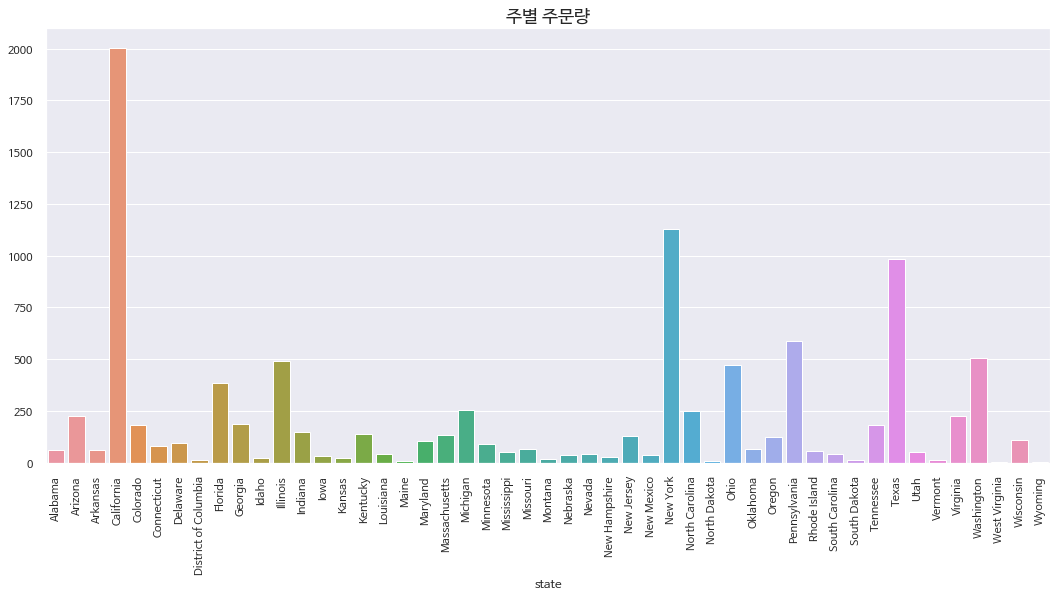

In [47]:
f, ax = plt.subplots(1,1,figsize=(18,8))

g = sns.countplot(s_df['state'].sort_values(),ax=ax)

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_title('주별 주문량',size=18)
g.set_ylabel('')

plt.show()

## 4-2 세그먼트/지역별 주문량

In [48]:
s_df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,seg,country,city,state,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


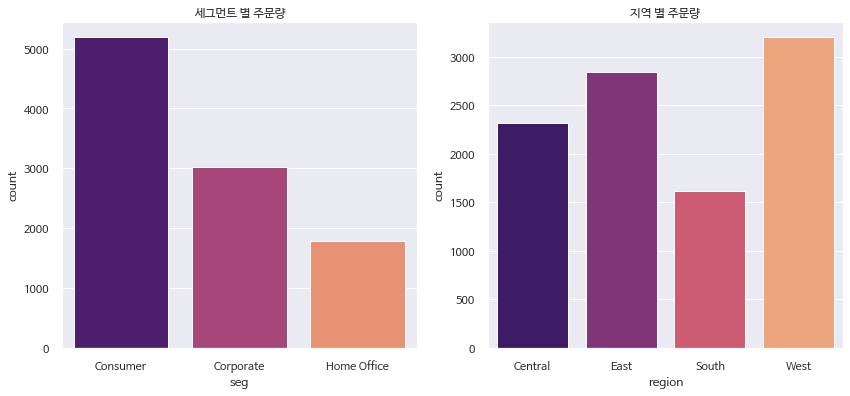

In [52]:
# 세그먼트 별 , 지역별 주문량

f ,ax = plt.subplots(1,2,figsize=(14,6))

sns.countplot(x=s_df['seg'].sort_values(),palette='magma',ax=ax[0])
ax[0].set_title('세그먼트 별 주문량')

sns.countplot(x=s_df['region'].sort_values(),palette='magma',ax=ax[1])
ax[1].set_title('지역 별 주문량')
plt.show()

##4-3 할인률에 따른 마진

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


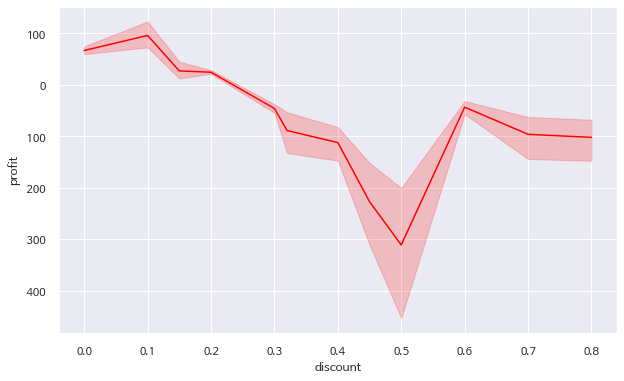

In [53]:
#sns.lineplot : 추정 회귀선과 신뢰구간을 같이 확인할 수 있다.
#면적은 신뢰구간을 나타낸다.
#estimator = None 으로 두면 x값에 y가 여러개이므로 그래프가 이상해진다.

f, ax = plt.subplots(1,1,figsize=(10,6))

sns.lineplot(x=s_df['discount'],y=s_df['profit'],color='red',ax=ax)

## 4-5 상관관계 Heatmap 그리기

In [54]:
s_df.head(4)

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,seg,country,city,state,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [56]:
s_corr = s_df[['sales','quantity','discount','profit']].corr()
s_corr

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '판매가 판매량 할인가 마진의 상관관계')

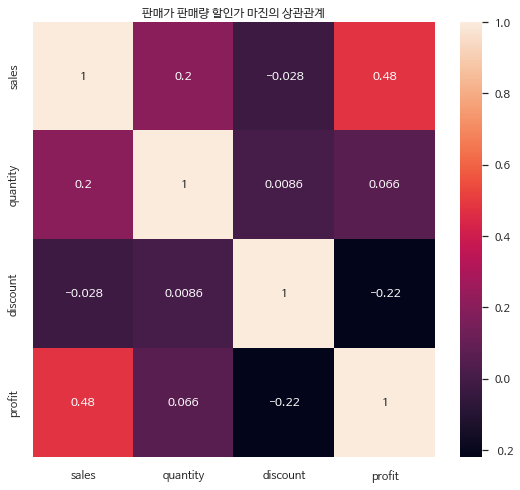

In [57]:
f , ax = plt.subplots(1,1,figsize=(9,8))

sns.heatmap(s_corr, annot=True, ax=ax)

plt.title('판매가 판매량 할인가 마진의 상관관계')

# 판매가가 높을 수록 마진이 높음.
#할인률이 높을 수록 마진이 낮음

## 4-5 판매금액에 따른 상위 10개 품목

In [59]:
top_prd1 = s_df.groupby('product_name').sum().sort_values('sales',ascending=False).head(10)

top_prd1

,row_id,sales,quantity,discount,profit
product_name,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,5.684342e-14
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4.094977e+03
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03


In [60]:
top_prd1.reset_index(inplace=True)

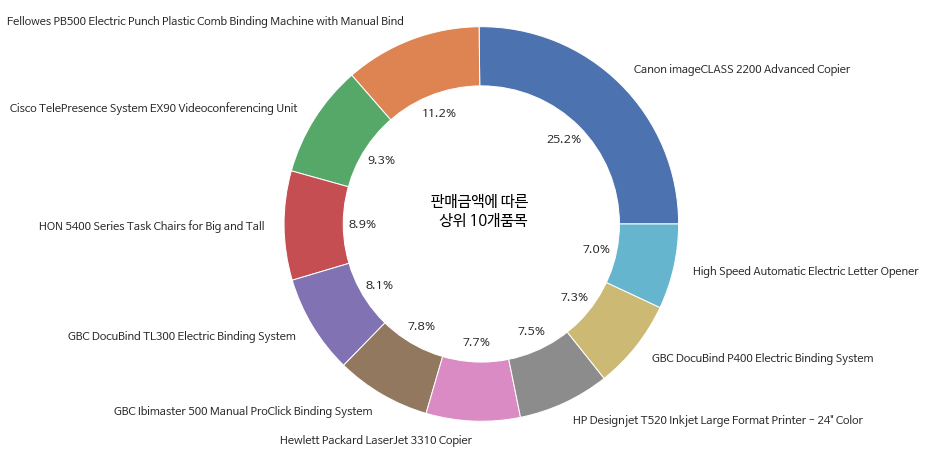

In [83]:
f,ax = plt.subplots(1,1,figsize=(9,8))

ax.pie(top_prd1['sales'],labels=top_prd1['product_name'],autopct='%1.1f%%',startangle=0)

ax.set_ylabel('')

center_circle = plt.Circle((0,0),0.7,fc='white')

fig=plt.gcf()

fig.gca().add_artist(center_circle)

ax.axis('equal') # 중심축을 같게 하기.

label = ax.annotate('판매금액에 따른 \n 상위 10개품목',color='black',xy=(0,0),fontsize=15,ha='center')



## 4-6 주별 총 판매금액을 지도 위에 반응형으로 나타내기

In [75]:
sales = s_df.groupby('state').sum().sort_values('sales',ascending=False)

sales.reset_index(level=0,inplace=True)

sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504


In [76]:
# 워싱턴 DC는 제거해주기.

dc=sales [sales['state']=='District of Columbia'].index

sales=sales.drop(dc)

sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504


In [77]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

state_cd = pd.DataFrame(state,state_code)

state_cd.reset_index(inplace=True)

state_cd.columns=['state_cd','state']

state_cd

,state_cd,state
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado
5,CT,Connecticut
6,DE,Delaware
7,FL,Florida
8,GA,Georgia
9,ID,Idaho


In [78]:
sales=sales.sort_values('state',ascending=True)

sales.reset_index(inplace=True)

sales.insert(1,'statecd',state_cd['state_cd']) # 1번 위치에 statecd라는 이름으로 state_cd의 state_cd열을 갔다 붙여라.

sales

,index,statecd,state,row_id,sales,quantity,discount,profit
0,26,AL,Alabama,243876,19510.6400,256,0.00,5786.8253
1,15,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246
2,30,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871
3,0,CA,California,10137449,457687.6315,7667,145.60,76381.3871
4,17,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579
5,29,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918
6,21,DE,Delaware,504370,27451.0690,367,0.60,9977.3748
7,5,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017
8,12,GA,Georgia,883590,49095.8400,705,0.00,16250.0433
9,41,ID,Idaho,129427,4382.4860,64,1.80,826.7231


In [79]:
sales=sales.drop(columns=['index'],axis=1)

In [80]:
sales

,statecd,state,row_id,sales,quantity,discount,profit
0,AL,Alabama,243876,19510.6400,256,0.00,5786.8253
1,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246
2,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871
3,CA,California,10137449,457687.6315,7667,145.60,76381.3871
4,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579
5,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918
6,DE,Delaware,504370,27451.0690,367,0.60,9977.3748
7,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017
8,GA,Georgia,883590,49095.8400,705,0.00,16250.0433
9,ID,Idaho,129427,4382.4860,64,1.80,826.7231


In [82]:
import plotly.express as px

fig= px.choropleth(locations=sales['statecd'],locationmode='USA-states',color=sales['sales'],scope='usa',color_continuous_scale='peach',title='주별 총 판매금액')

fig.show()